In [1]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick

In [2]:
ls

 baic_MTT_27_9.png
 CID_5490884_ctdchemicalgene.csv
 DMSO_MTT_28_10.png
 DOXO_BAIC_MDA231_540.xls
 DOXO_BAIC_MDA231_620.xls
 fda-pi-dmso-lyco/
 final_results/
 Lycopene_MTT_28_10.png
 mda-mb-231_dmso_lyco_28_10_540.xls
 mda-mb-231_dmso_lyco_28_10_620.xls
'mda-mb-231_garcinolo_(10-50)_29-11_540.xls'
'mda-mb-231_garcinolo_(10-50)_29-11_620.xls'
'mda-mb-231_garcinolo_(10-50)_doxo(4-32)_6-12_540.xls'
'mda-mb-231_garcinolo_(10-50)_doxo(4-32)_6-12_620.xls'
 mda-mb-231_lyco_baic_doxo_13_10_540.xls
 mda-mb-231_lyco_baic_doxo_13_10_620.xls
 mda-mb-231_lyco_dmso_doxo_25_10_540.xls
 mda-mb-231_lyco_dmso_doxo_25_10_620.xls
 mda-mb-231_lyco_doxo_19_10_540.xls
 mda-mb-231_lyco_doxo_19_10_620.xls
 mda-mb-231_lyco_doxo_20_10_540.xls
 mda-mb-231_lyco_doxo_20_10_620.xls
 mda-mb-doxo_baic_06_10_540.xls
 mda-mb-doxo_baic_06_10_620.xls
 mda-mb-lyco_baic_doxo_11_10_540.xls
 mda-mb-lyco_baic_doxo_11_10_620.xls
 MTT_06-10_doxo-baic-Copy1.ipynb
 MTT_06-10_doxo-baic.ipynb
 MTT_11-10_lyco_baic_doxo.ipynb
 MTT-13

In [3]:
data_540= pd.read_excel('mda-mb-231_garcinolo_(10-50)_doxo(4-32)_6-12_540.xls',sheet_name='List ; Plates 1 - 1', header=0)
data_620= pd.read_excel('mda-mb-231_garcinolo_(10-50)_doxo(4-32)_6-12_620.xls',sheet_name='List ; Plates 1 - 1')

WARNING *** file size (20729) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (20735) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [4]:
data_540.head()

,Plate,Repeat,Well,Type,Time,Absorbance @540 (A)
0,1,1,A01,M,00:00:14.060000,2.345398
1,1,1,A02,M,00:00:14.380000,2.386826
2,1,1,A03,M,00:00:14.700000,2.259816
3,1,1,A04,M,00:00:15.020000,2.075537
4,1,1,A05,M,00:00:15.340000,2.024878


In [5]:
data_620.head()

,Plate,Repeat,Well,Type,Time,Absorbance @620 (A)
0,1,1,A01,M,00:00:13.410000,0.647809
1,1,1,A02,M,00:00:13.730000,0.657602
2,1,1,A03,M,00:00:14.050000,0.625301
3,1,1,A04,M,00:00:14.370000,0.591295
4,1,1,A05,M,00:00:14.690000,0.568383


In [6]:
Data=pd.concat([data_540['Absorbance @540 (A)'], data_620['Absorbance @620 (A)']], axis=1)

In [7]:
Data['Difference']=Data['Absorbance @540 (A)']-data_620['Absorbance @620 (A)']
#for ind in Data.index:
    #print(ind, Data.at[ind,'Absorbance @540 (A)'],Data.at[ind,'Difference'])
Data

,Absorbance @540 (A),Absorbance @620 (A),Difference
0,2.345398,0.647809,1.697588
1,2.386826,0.657602,1.729224
2,2.259816,0.625301,1.634515
3,2.075537,0.591295,1.484243
4,2.024878,0.568383,1.456495
...,...,...,...
91,0.038760,0.037534,0.001226
92,0.039096,0.037763,0.001333
93,0.038775,0.037584,0.001191
94,0.038656,0.037476,0.001181


In [8]:
Data=Data[Data['Difference']>0.05]


In [9]:
Data['Mean Difference']=np.nan

def reject_outliers_2(data, m=2):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d / (mdev if mdev else 1.)
    return data[s < m]

for i in range (3,96,3):
    data_tmp=Data.iloc[i-3:i,::]
   # print(data_tmp['Difference'])
    Data.iloc[i-3:i]['Mean Difference']=reject_outliers_2(data_tmp['Difference'],m=2).mean()

/tmp/ipykernel_26122/3583868716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Mean Difference']=np.nan
/tmp/ipykernel_26122/3583868716.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data.iloc[i-3:i]['Mean Difference']=reject_outliers_2(data_tmp['Difference'],m=2).mean()
/home/maria/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/maria/anaconda3/lib/python3.9/site-packages/num

In [10]:
Data.head()

,Absorbance @540 (A),Absorbance @620 (A),Difference,Mean Difference
0,2.345398,0.647809,1.697588,1.687109
1,2.386826,0.657602,1.729224,1.687109
2,2.259816,0.625301,1.634515,1.687109
3,2.075537,0.591295,1.484243,1.458827
4,2.024878,0.568383,1.456495,1.458827


In [11]:

df = Data.groupby(Data.index // 3).mean()
df=df[df['Mean Difference']>0.1]

IN=['CTRL1',u'garcinolo 10 \u03bcM',u'garcinolo 20 \u03bcM',u'garcinolo 30 \u03bcM',u'garcinolo 40 \u03bcM',u'garcinolo 50 \u03bcM','CTRL2',u'garcinolo2 10 \u03bcM',u'garcinolo2 20 \u03bcM',u'garcinolo2 30 \u03bcM',u'garcinolo2 40 \u03bcM',u'garcinolo2 50 \u03bcM']
IN2=['CTRL3',u'doxorubicin 4 \u03bcM',u'doxorubicin 8 \u03bcM',u'doxorubicin 16 \u03bcM',u'doxorubicin 32 \u03bcM','CTRL4',u'doxorubicin2 4 \u03bcM',u'doxorubicin2 8 \u03bcM',u'doxorubicin2 16 \u03bcM',u'doxorubicin2 32 \u03bcM']
IN.extend(IN2)

index = pd.Index(IN)
#df['indices']=IN
df.set_index(index,inplace=True)

In [22]:
df.head()

,Absorbance @540 (A),Absorbance @620 (A),Difference,Mean Difference,Vitalità
CTRL1,2.330680,0.643571,1.687109,1.687109,100.000000
garcinolo 10 μM,2.042386,0.575087,1.467299,1.458827,86.469065
garcinolo 20 μM,1.558566,0.453872,1.104694,1.104694,65.478544
garcinolo 30 μM,0.569749,0.189032,0.380717,0.321988,19.085209
garcinolo 40 μM,0.343328,0.138762,0.204566,0.204566,12.125264


In [13]:
vitality=[]
for i in df.index:
    if 'CTRL' in i:
        ctrl=i
        print(i)
    #print(df['Mean Difference'][ctrl])
    #print('>',df['Mean Difference'][i]*100)
    vit=(df['Mean Difference'][i]*100)/df['Mean Difference'][ctrl]
    vitality.append(vit)
df['Vitalità']=vitality


CTRL1
CTRL2
CTRL3
CTRL4


In [14]:
df.iloc[:6,::]

,Absorbance @540 (A),Absorbance @620 (A),Difference,Mean Difference,Vitalità
CTRL1,2.330680,0.643571,1.687109,1.687109,100.000000
garcinolo 10 μM,2.042386,0.575087,1.467299,1.458827,86.469065
garcinolo 20 μM,1.558566,0.453872,1.104694,1.104694,65.478544
garcinolo 30 μM,0.569749,0.189032,0.380717,0.321988,19.085209
garcinolo 40 μM,0.343328,0.138762,0.204566,0.204566,12.125264
garcinolo 50 μM,0.331061,0.133460,0.197601,0.203570,12.066212


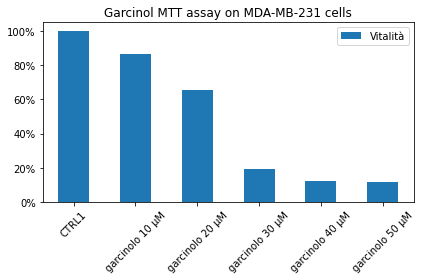

In [15]:
ax_garc1 = df.iloc[:6,::].plot.bar(y='Vitalità', rot=45)
ax_garc1.set_title('Garcinol MTT assay on MDA-MB-231 cells')
ax_garc1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax_garc1.legend()
fig1 = ax_garc1.get_figure()
fig1.tight_layout()
fig1.savefig('Garcinolo1_MTT_28_10.png',dpi=300)

In [16]:
df.iloc[6:12,::]

,Absorbance @540 (A),Absorbance @620 (A),Difference,Mean Difference,Vitalità
CTRL2,2.147956,0.599438,1.548518,1.577890,100.000000
garcinolo2 10 μM,1.885513,0.536533,1.348979,1.386955,87.899323
garcinolo2 20 μM,1.662066,0.476417,1.185649,1.228386,77.849911
garcinolo2 30 μM,0.564698,0.188782,0.375917,0.375917,23.824011
garcinolo2 40 μM,0.361697,0.141219,0.220478,0.213989,13.561731
garcinolo2 50 μM,0.328077,0.131851,0.196226,0.196226,12.435941


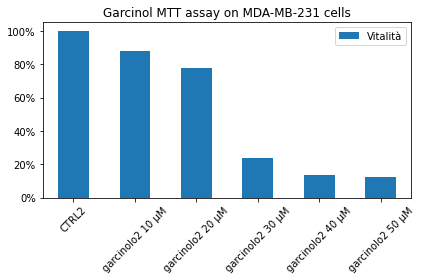

In [17]:
ax_garc1 = df.iloc[6:12,::].plot.bar(y='Vitalità', rot=45)
ax_garc1.set_title('Garcinol MTT assay on MDA-MB-231 cells')
ax_garc1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax_garc1.legend()
fig1 = ax_garc1.get_figure()
fig1.tight_layout()
fig1.savefig('Garcinolo1_MTT_6_12.png',dpi=300)

In [18]:
df.iloc[12:17,::]

,Absorbance @540 (A),Absorbance @620 (A),Difference,Mean Difference,Vitalità
CTRL3,1.820583,0.523049,1.297533,1.270336,100.000000
doxorubicin 4 μM,1.734458,0.509561,1.224897,1.224897,96.423031
doxorubicin 8 μM,1.741991,0.506855,1.235136,1.235136,97.229057
doxorubicin 16 μM,1.381040,0.418141,0.962898,0.962898,75.798703
doxorubicin 32 μM,1.370088,0.423647,0.946441,0.917038,72.188635


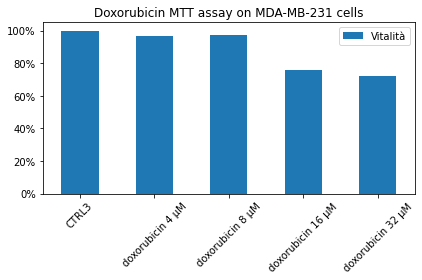

In [19]:
ax_dox1= df.iloc[12:17,::].plot.bar(y='Vitalità', rot=45)
ax_dox1.set_title('Doxorubicin MTT assay on MDA-MB-231 cells')
ax_dox1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax_dox1.legend()

fig1 = ax_dox1.get_figure()
fig1.tight_layout()


In [20]:
df.iloc[17::,::]

,Absorbance @540 (A),Absorbance @620 (A),Difference,Mean Difference,Vitalità
CTRL4,1.765351,0.521690,1.243662,1.321013,100.000000
doxorubicin2 4 μM,1.708656,0.495865,1.212792,1.307636,98.987366
doxorubicin2 8 μM,1.794175,0.502193,1.291982,1.291982,97.802389
doxorubicin2 16 μM,1.486849,0.438107,1.048742,0.998968,75.621383
doxorubicin2 32 μM,1.400685,0.429170,0.971515,0.971515,73.543193


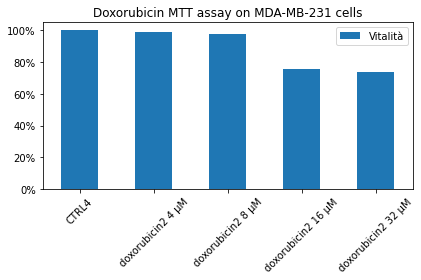

In [21]:
ax_doxo2 = df.iloc[17::,::].plot.bar(y='Vitalità', rot=45)
ax_doxo2.set_title('Doxorubicin MTT assay on MDA-MB-231 cells')
ax_doxo2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax_doxo2.legend()
fig2 = ax_doxo2.get_figure()
fig2.tight_layout()
